In [39]:
%matplotlib inline  

In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy import ndimage
from skimage.morphology import label
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Input data files are available in the "../input/" directory.
#Simple CNN keras
from keras.layers import Lambda
from keras.models import Model , load_model
from keras.models import Sequential
from keras.layers import concatenate
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras.losses import binary_crossentropy
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2DTranspose
from keras import backend as K

import tensorflow as tf
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
from subprocess import check_output
import os

from skimage.transform import rescale, resize, downscale_local_mean
import tensorflow as tf
# Any results you write to the current directory are saved as output.

In [112]:
train_dir = "stage1_train"

In [113]:
train_images = [i for i in os.listdir(train_dir)]

In [114]:
train_images = train_images[1:]

In [116]:
len(train_images)

670

In [117]:
bad_images = ['7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80','b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe','9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e','58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921']

In [118]:
messy_masks = ['a09ae9559f817b104e049e5bb01cf4ad1b87e3ef7fad3dcf932b6585ca3edc05']

In [171]:
final_images = []

for dirs in train_images:
    if dirs in bad_images:
        continue
    final_images.append(plt.imread(train_dir + '/' + dirs + '/' + 'images/' + dirs+ '.png'))

    

In [172]:
len(final_images)

666

In [173]:
label_masks = []
for dirs in train_images:
    if dirs in bad_images:
        continue
    for i,img in enumerate(os.listdir(train_dir +'/' +dirs + "/" + "masks/")):
        if i == 0:
            try:
                maximum = plt.imread(train_dir + '/' + dirs + "/" + "masks/" + img)
            except:
                continue
        else:
            try:
                if img in messy_masks:
                    continue
                image = plt.imread(train_dir + '/' + dirs + "/" + "masks/" + img)
                maximum = np.maximum(maximum,image)
            except:
                continue
    label_masks.append(maximum)

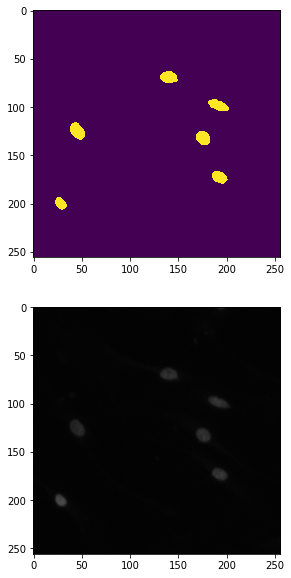

In [167]:
plt.figure(1,figsize= (10,10))
plt.subplot(2,1,1)
plt.imshow(label_masks[20])
plt.subplot(2,1,2)
plt.imshow(final_images[20])

In [123]:
label_masks = np.array(label_masks)

In [124]:
final_images = np.array(final_images)

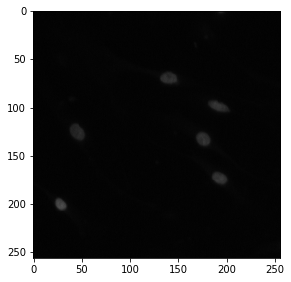

In [125]:
plt.figure(1.,figsize = (10,10))
#plt.subplot(2,1,1)
#plt.imshow(label_masks[20])
plt.subplot(2,1,1) 
plt.imshow(final_images[20])

In [126]:
label_masks[20].shape

(256, 256)

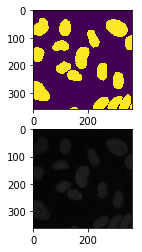

In [233]:
plt.figure(1)
plt.subplot(2,1,1)
plt.imshow(label_masks[10])
plt.subplot(2,1,2) 
plt.imshow(final_images[10])

In [ ]:
#Sanity check
for i in range(len(new_label_masks)):
    if new_label_masks[i].shape != new_final_images[i].shape[0:2]:
        print(i)
        print(label_masks[i].shape)
        print(final_images[i].shape)
        print("np")
    else:
        continue

In [90]:
new_final_images = []
new_label_masks = []
for i in range(len(label_masks)):
    if i == 61 or i == 622 or i == 629:
        continue
    else:
        new_final_images.append(final_images[i])
        new_label_masks.append(label_masks[i])

In [177]:
#Data Augumentation
aug_images = []
aug_masks = []
for i in range(len(new_final_images)):
    if i%4 == 0:
        temp_shape = new_final_images[i].shape
        temp_image = new_final_images[i][0:temp_shape[0]//2,0:temp_shape[1]//2,:]
        temp_mask = new_label_masks[i][0:temp_shape[0]//2,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 1:
        temp_shape = new_final_images[i].shape
        temp_image = new_final_images[i][0:temp_shape[0]//2,temp_shape[1]//2:,:]
        temp_mask = new_label_masks[i][0:temp_shape[0]//2,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 2:
        temp_shape = new_final_images[i].shape
        temp_image = new_final_images[i][temp_shape[0]//2:,temp_shape[1]//2:,:]
        temp_mask = new_label_masks[i][temp_shape[0]//2:,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 3:
        temp_shape = new_final_images[i].shape
        temp_image = new_final_images[i][temp_shape[0]//2:,0:temp_shape[1]//2,:]
        temp_mask = new_label_masks[i][temp_shape[0]//2:,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)

In [179]:
print(aug_images[1].shape)
print(final_images[1].shape)

(128, 128, 4)
(256, 256, 4)


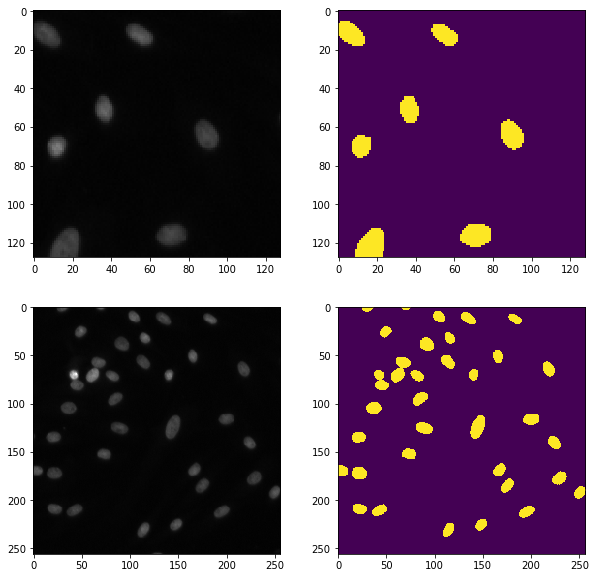

In [186]:
plt.figure(1,figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(aug_images[1])
plt.subplot(2,2,2)
plt.imshow(aug_masks[1])
plt.subplot(2,2,3)
plt.imshow(new_final_images[1])
plt.subplot(2,2,4)
plt.imshow(new_label_masks[1])

In [184]:
final_images_final = np.concatenate([new_final_images,aug_images])

In [185]:
label_masks_final = np.concatenate([new_label_masks,aug_masks])

In [187]:
len(label_masks_final)

1326

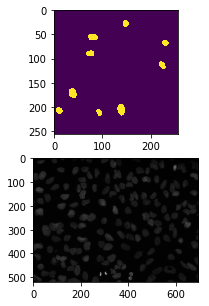

In [170]:
plt.figure(1 ,figsize = (5,5))
plt.subplot(2,1,1)
plt.imshow(np.squeeze(label_masks[61]))
plt.subplot(2,1,2) 
plt.imshow(final_images[61])

In [153]:
a[0:2]

(1, 2)

In [188]:
for  i in range(len(label_masks_final)):
    try:
        final_images_final[i] = resize(final_images_final[i] , (128,128,4) , preserve_range=True)
        label_masks_final[i] = resize(label_masks_final[i] , (128,128,1) , preserve_range=True)
    except:
        print(final_images_final[i].shape)
        

/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [189]:
final_images_final = np.stack(final_images_final)
label_masks_final = np.stack(label_masks_final)

In [191]:
print(final_images_final.shape)
print(label_masks_final.shape)

(1326, 128, 128, 4)
(1326, 128, 128, 1)


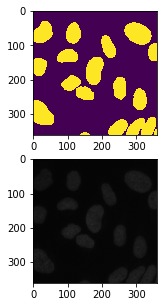

In [192]:
plt.figure(1 ,figsize = (5,5))
plt.subplot(2,1,1)
plt.imshow(np.squeeze(label_masks[10]))
plt.subplot(2,1,2) 
plt.imshow(final_images[10])

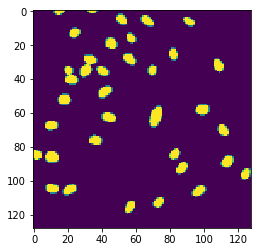

In [198]:
plt.imshow(np.squeeze(label_masks_final[1]))

In [203]:
#Ones and Zeros
for i in range(len(label_masks_final)):
    label_masks_final[i][label_masks_final[i] > 0.5] = 1
    label_masks_final[i][label_masks_final[i] <= 0.5] = 0
    

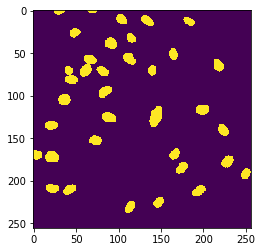

In [204]:
plt.imshow(np.squeeze(label_masks[1]))

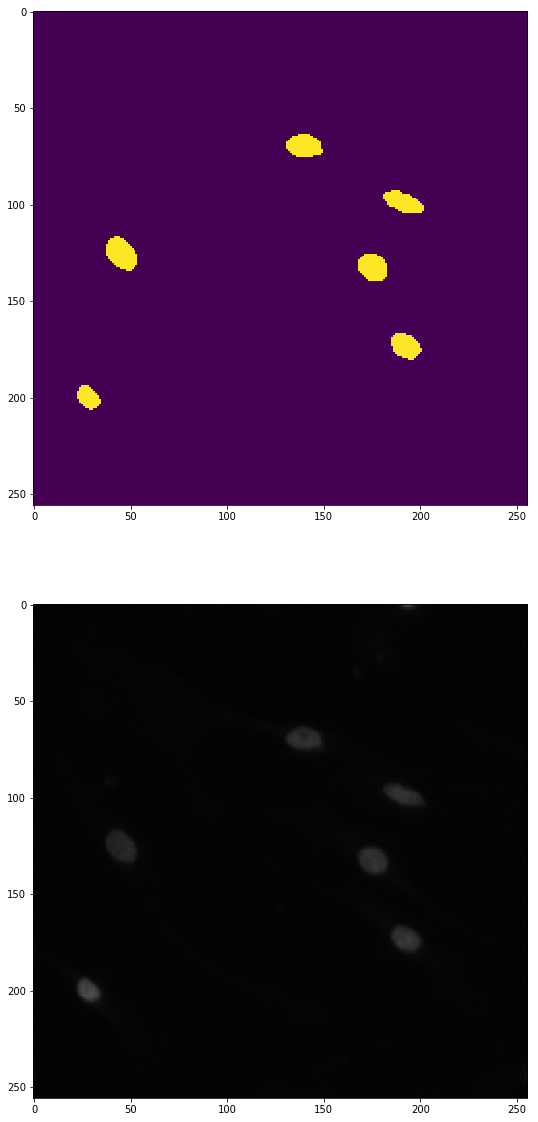

In [205]:
plt.figure(1 ,figsize = (20,20))
plt.subplot(2,1,1)
plt.imshow(np.squeeze(label_masks[20]))
plt.subplot(2,1,2) 
plt.imshow(final_images[20])

In [234]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.5)
    y_pred = label(y_pred_in > 0.5)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.array(np.mean(metric), dtype=np.float32)

def my_iou_metric(label, pred):
    metric_value = tf.py_func(iou_metric_batch, [label, pred], tf.float32)
    return metric_value

In [235]:
# Build U-Net model
inputs = Input((128, 128, 4))
s = inputs

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[my_iou_metric])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 592         input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 16) 2320        dropout_1[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [236]:
earlystopper = EarlyStopping(monitor = 'val_loss',patience=3, verbose=1)

In [237]:
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', monitor = 'val_loss',verbose=1, save_best_only=True)

In [239]:
results = model.fit(final_images_final, label_masks_final, validation_split=0.1, batch_size=40, epochs=10 ,callbacks=[earlystopper,checkpointer])

Train on 1193 samples, validate on 133 samples
Epoch 1/10
 160/1193 [===>..........................] - ETA: 3:53 - loss: 0.5548 - my_iou_metric: 1.5998e-06

KeyboardInterrupt: 

In [ ]:
#reading test set
test_dir = os.listdir("../input/stage1_test")

In [ ]:
test_images = []
size_test = []
for dirs in test_dir:
    test_images.append(plt.imread("../input/stage1_test/"+ dirs + "/" + "images"+"/"+os.listdir("../input/stage1_test/"+ dirs + "/" + "images")[0]))
for i in range(len(test_images)):
    size_test.append([test_images[i].shape[0], test_images[i].shape[1]])
    test_images[i] = resize(test_images[i] , (128,128,4))
    

In [ ]:
test_images = np.array(test_images)
test_images = np.stack(test_images)
print(test_images.shape)

In [ ]:
prediction = model.predict(test_images)

In [ ]:
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0

In [ ]:
plt.imshow(np.squeeze(prediction[0]))

In [ ]:
plt.imshow(np.squeeze(label_masks[1]))

In [ ]:
preds_test_upsampled = []
for i in range(len(prediction)):
    preds_test_upsampled.append(resize(np.squeeze(prediction[i]), 
                                       (size_test[i][0], size_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [ ]:
np.unique(prediction[1])

In [ ]:
preds_test_upsampled[1].shape

In [ ]:
preds_test_upsampled[preds_test_upsampled >= 0.5] = 1
preds_test_upsampled[preds_test_upsampled < 0.5] = 0

In [ ]:
plt.imshow(np.squeeze(prediction[1]))

In [ ]:
plt.imshow(np.squeeze(preds_test_upsampled[1]))

In [ ]:
for i in range(len(preds_test_upsampled)):
    preds_test_upsampled[i][preds_test_upsampled[i] > 0.5] = 1
    preds_test_upsampled[i][preds_test_upsampled[i] <= 0.5] = 0

In [ ]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)

In [ ]:
list(rle_encoding(preds_test_upsampled[0]))

In [ ]:
new_test_ids = []
rles = []
for n, id_ in enumerate(test_dir):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))

In [ ]:
len(np.unique(new_test_ids))

In [ ]:
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('submit_final.csv', index=False)

In [ ]:
sub

2.5923527e+21
